In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [223]:
def rank_plot(x,g,xlab,tstr,topn=8):

    xq=xr.DataArray([x.groupby(g[p]).mean() for p in g.data_vars],dims=['param','qnt'])
    xq['param']=g.data_vars
    ix=np.argsort(abs(xq.isel(qnt=-1)-xq.isel(qnt=0)))[-topn:]
    nq=len(xq.qnt)
    q=np.arange(nq)/nq-1
    
    
    plt.figure(figsize=[3,4])
    plt.plot([x.isel(ens=0),x.isel(ens=0)],[-1,topn],':k')
    for i,j in enumerate(ix.values):
        param=xq.param[j]
        plt.plot(xq.sel(param=param),np.zeros(nq)+i,'-ro',mfc='none')
        plt.plot(xq.sel(param=param,qnt=nq-1),i,'ro')
    
    plt.xlabel(xlab)
    plt.ylim([-0.5,topn-0.5])
    plt.yticks(range(topn),xq.param[ix.values].values)
    plt.title(tstr)

In [180]:
#load data
d='/glade/work/linnia/CLM6-PPE/ctsm6_lhc/postp/'
f='ctsm6lhc_gmean_amean_1850-2023.nc'
ds=xr.open_dataset(d+f)


In [197]:
#load parameter key and define quantiles (in this case 5)
key = '/glade/work/linnia/CLM6-PPE/ctsm6_lhc/ctsm6lhc_11262024.txt'
params = pd.read_csv(key).drop(columns='member')
p0=xr.Dataset(params)
p=xr.concat([p0.isel(dim_0=0)*np.nan,p0],dim='dim_0') #adding a nan row for default sim
p['ens']=xr.DataArray(ds.ens.values,dims='dim_0')
p=p.swap_dims({'dim_0':'ens'})
g=np.floor(p*5)

In [166]:
# landarea for conversion factor
f='~/helpers/sparsegrid_landarea.nc'
la=xr.open_dataset(f).landarea
cf=1e-9*365*24*60*60*la.sum().compute()

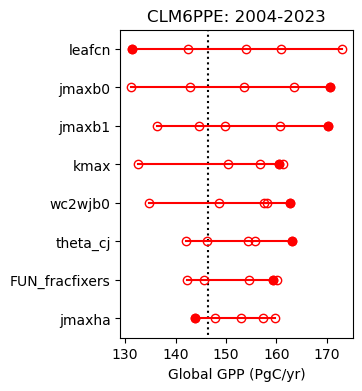

In [224]:
#compute metric and plot
x=cf*ds.GPP_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global GPP (PgC/yr)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)

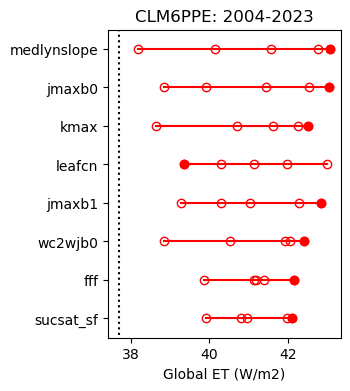

In [225]:
#compute metric and plot
x=ds.EFLX_LH_TOT_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global ET (W/m2)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)

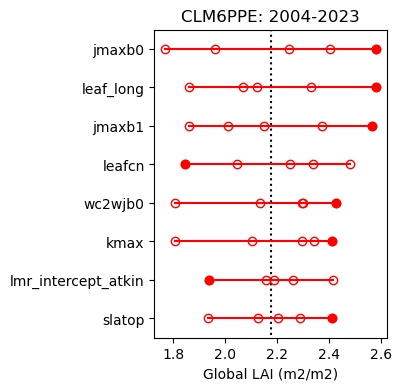

In [226]:
#compute metric and plot
x=ds.TLAI_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global LAI (m2/m2)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)

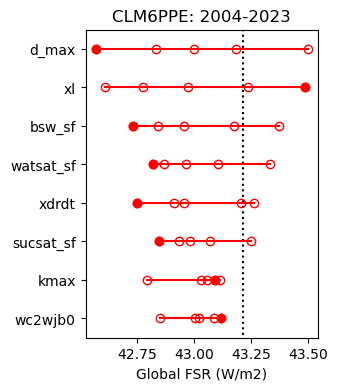

In [227]:
#compute metric and plot
x=ds.FSR_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global FSR (W/m2)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)

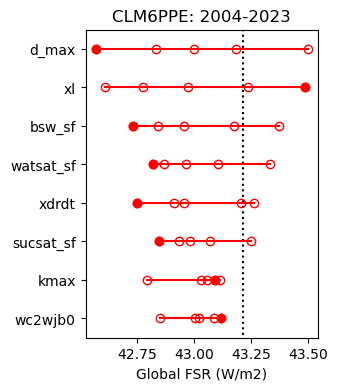

In [228]:
#compute metric and plot
x=ds.FSR_global_amean.sel(year=slice(2004,2023)).mean(dim='year')
xlab='Global FSR (W/m2)'
tstr='CLM6PPE: 2004-2023'
rank_plot(x,g,xlab,tstr,topn=8)